In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\Manager\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
df=pd.read_json("logins.json")

In [3]:
df.head()

,login_time
0,1970-01-01 20:13:18
1,1970-01-01 20:16:10
2,1970-01-01 20:16:37
3,1970-01-01 20:16:36
4,1970-01-01 20:26:21


To aggregate the data, it must be indexed by datetime and then each login must be counted as an instance.

In [12]:
df.login_time = pd.to_datetime(df.login_time)#convert to datetime object
df.index = (df.login_time) # set datetime as index
df['login'] = 1 #count each observation as an instance
#df = df.drop('login_time') #drop original login_time

In [13]:
df15 = pd.DataFrame(df.login.resample('15Min').sum()) #aggregate as the sum of instances over 15 min
df15 = df15.fillna(0) #fill missing values as zero to indicate no logins during that interval

In [14]:
df15.head()

,login
login_time,
1970-01-01 20:00:00,2
1970-01-01 20:15:00,6
1970-01-01 20:30:00,9
1970-01-01 20:45:00,7
1970-01-01 21:00:00,1


Now analysis can begin. Begin with a seasonal decomposition of the data over time to look for trends and patterns.

Text(0.5, 1.0, 'total log-ins seasonality')

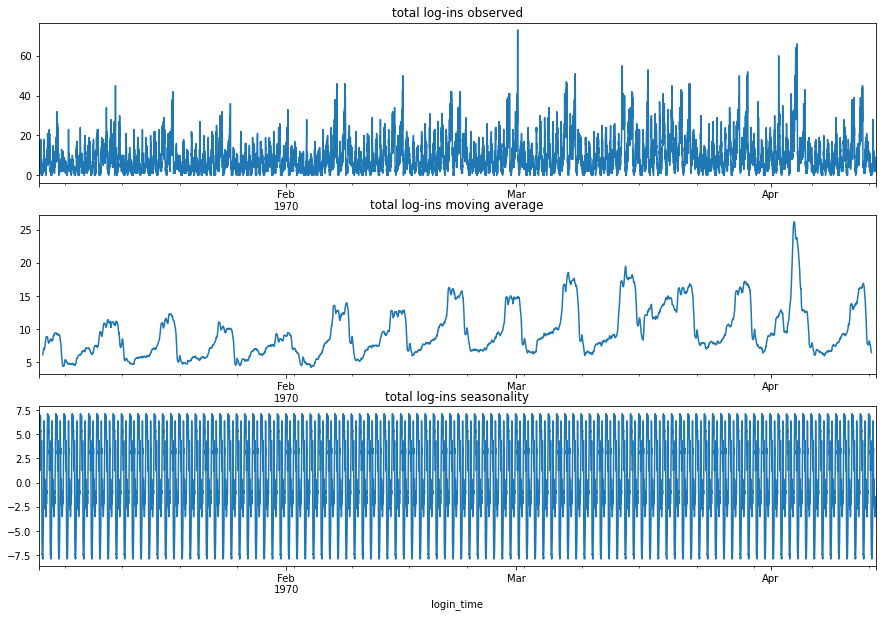

In [15]:
from statsmodels.tsa import seasonal
import statsmodels as sm

plt.figure(figsize=(15,10))

#decompose series and plot
r = sm.tsa.seasonal.seasonal_decompose(df15.login, model='additive', freq=96)
plt.subplot(3,1,1)
r.observed.plot()
plt.title('total log-ins observed')
plt.subplot(3,1,2)
r.trend.plot()
plt.title('total log-ins moving average')
plt.subplot(3,1,3)
r.seasonal.plot()
plt.title('total log-ins seasonality')